## Libraries

In [127]:
import pandas as pd
import numpy as np
from statsmodels.regression.rolling import RollingOLS
import warnings
import pandas_market_calendars as mcal
from pypfopt import EfficientFrontier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt, timedelta

## Regression

In [2]:
SP500=pd.read_csv('SP500_prices.csv', index_col=0)

aggiungo colonna

In [3]:
SP500['logreturn']=0
SP500

,Date,Price,logreturn
0,2017-06-01,2430.06,0
1,2017-06-02,2439.07,0
2,2017-06-05,2436.10,0
3,2017-06-06,2429.33,0
4,2017-06-07,2433.14,0
...,...,...,...
1777,2024-06-25,5469.30,0
1778,2024-06-26,5477.90,0
1779,2024-06-27,5482.87,0
1780,2024-06-28,5460.48,0


aggiungo logreturns market

In [4]:
warnings.filterwarnings('ignore')
for i in range(len(SP500)-1):
    SP500['logreturn'][i+1]=np.log(SP500['Price'][i+1]/SP500['Price'][i])

In [5]:
SP500.drop(index=0, inplace=True)

In [6]:
SP500

,Date,Price,logreturn
1,2017-06-02,2439.07,0.003701
2,2017-06-05,2436.10,-0.001218
3,2017-06-06,2429.33,-0.002783
4,2017-06-07,2433.14,0.001567
5,2017-06-08,2433.79,0.000267
...,...,...,...
1777,2024-06-25,5469.30,0.003926
1778,2024-06-26,5477.90,0.001571
1779,2024-06-27,5482.87,0.000907
1780,2024-06-28,5460.48,-0.004092


Creo df di logreturns di ogni singola stock

In [7]:
prices_of_stocks=pd.read_csv('prices_stocks_list.csv', index_col=0)

In [8]:
logreturns_stocks=prices_of_stocks

In [9]:
list_of_stocks=list(prices_of_stocks.columns)
list_of_stocks.remove('Date')

In [10]:
logreturns_stocks.drop('Date', axis=1, inplace=True)

In [11]:
logreturns_stocks=logreturns_stocks.apply(lambda x: np.log(x / x.shift(1)))

In [12]:
logreturns_stocks

,A,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,...,WRK,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001316,0.009537,0.014711,0.008063,0.008640,0.003585,0.014744,-0.015939,0.009519,-0.023199,...,-0.003081,0.003744,0.000000,0.008126,0.003940,-0.014982,0.010622,0.002165,0.010300,-0.002237
2,-0.006765,0.004433,-0.009826,0.003858,0.002577,0.006658,0.000766,-0.027060,-0.006654,0.001188,...,-0.008200,-0.000884,-0.003887,-0.010450,-0.009984,0.007768,0.003766,0.002834,-0.000081,0.002716
3,-0.004979,0.000000,0.003373,0.005318,-0.005593,-0.001977,-0.003908,0.016997,0.000238,0.000989,...,-0.009745,-0.011353,0.000898,-0.005115,-0.006291,0.013513,-0.009632,0.001616,0.001935,0.004934
4,0.008780,0.022267,0.005939,0.012883,0.004305,0.001740,0.004116,0.014706,-0.000953,0.003076,...,0.029494,-0.000138,-0.002420,-0.002189,0.007544,-0.003701,0.014508,-0.000808,0.001448,0.004436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,-0.002891,-0.002692,0.004458,-0.011587,0.001803,-0.000130,0.005157,0.008195,-0.024109,-0.003215,...,-0.017375,-0.012729,-0.026519,-0.009019,-0.004456,0.002802,-0.010245,-0.012466,-0.002215,-0.022719
1778,-0.011950,-0.000899,0.019796,0.002340,-0.005799,-0.008336,0.003373,-0.010913,0.000330,-0.042686,...,-0.010209,0.002202,-0.011380,-0.001927,0.000930,0.000350,-0.005272,-0.002800,0.001203,0.017234
1779,-0.017356,0.014286,0.003978,-0.012701,-0.002195,-0.004705,0.033665,-0.005104,-0.000989,-0.003030,...,0.000805,0.001440,0.009256,0.011395,0.001115,0.004274,0.001321,0.004914,0.002494,0.032016
1780,-0.008985,0.004423,-0.016388,0.014860,-0.007096,0.000725,0.015931,0.006946,-0.002643,0.005840,...,0.010400,-0.003845,0.006006,0.004030,-0.008204,0.001913,-0.005588,-0.001132,0.001383,-0.017724


In [13]:
logreturns_stocks.drop(index=0, inplace=True)

In [14]:
sample_size=180
SP500['const'] = 1

estraggo un dataframe con dentro tutti i valori, quindi avrò un df per ogni stock + parametri per 7 anni meno 180 gg

In [15]:
frameslist=[] #ticker based
model = RollingOLS(endog=logreturns_stocks[list_of_stocks[0]].values , exog=SP500[['const','logreturn']], window=180)
res=model.fit()
pvalues_alpha = [sublist[0] for sublist in res.pvalues]
pvalues_beta= [sublist[1] for sublist in res.pvalues]
frame=pd.DataFrame({
    list_of_stocks[0]: SP500['Date'][sample_size:len(SP500)],
    'alpha': res.params['const'],
    'beta': res.params['logreturn'],
    'rsquared': res.rsquared,
    'syst_risk': res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #betasquared times sigmam squared ->syst risk
    'spec_risk': np.std(logreturns_stocks[list_of_stocks[0]].values 
                     - (res.params['const']+(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2, #questi son i residui->spec risk
    'total_risk': np.std(logreturns_stocks[list_of_stocks[0]].values 
                         - (res.params['const']+(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2
    +res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #total somma tra i due
    'alpha_sign' : pvalues_alpha, #nota che sign è inversa, più è basso più è alta
    'beta_sign' : pvalues_beta
}) 
frame.drop(frame.index[0:sample_size], inplace=True)
frameslist.append(frame)
frameslist[0]

,A,alpha,beta,rsquared,syst_risk,spec_risk,total_risk,alpha_sign,beta_sign
181,2018-02-20,0.000180,1.209670,0.482291,0.000218,0.000173,0.000391,0.774297,6.048532e-38
182,2018-02-21,0.000264,1.201667,0.479098,0.000215,0.000173,0.000389,0.673998,1.745867e-37
183,2018-02-22,0.000223,1.200412,0.476525,0.000215,0.000173,0.000388,0.723672,4.063611e-37
184,2018-02-23,0.000104,1.164340,0.462567,0.000202,0.000173,0.000375,0.870246,3.456959e-35
185,2018-02-26,0.000080,1.143575,0.454124,0.000195,0.000173,0.000368,0.900455,4.553288e-34
...,...,...,...,...,...,...,...,...,...
1777,2024-06-25,-0.000405,1.100478,0.178517,0.000181,0.000173,0.000354,0.749971,4.989916e-10
1778,2024-06-26,-0.000438,1.111816,0.179515,0.000184,0.000173,0.000358,0.729682,4.359528e-10
1779,2024-06-27,-0.000535,1.113069,0.178498,0.000185,0.000173,0.000358,0.673854,5.002472e-10
1780,2024-06-28,-0.000623,1.109766,0.178282,0.000184,0.000173,0.000357,0.623239,5.150984e-10


In [16]:
# ripeto per ogni stock rimasta
warnings.filterwarnings('ignore')
k=0
for ticker in list_of_stocks:
    model = RollingOLS(endog=logreturns_stocks[ticker].values , exog=SP500[['const','logreturn']], window=180)
    res=model.fit()
    pvalues_alpha = [sublist[0] for sublist in res.pvalues]
    pvalues_beta= [sublist[1] for sublist in res.pvalues]
    frame=pd.DataFrame({
        ticker: SP500['Date'][sample_size:len(SP500)],
        'alpha': res.params['const'],
        'beta': res.params['logreturn'],
        'rsquared': res.rsquared,
        'syst_risk': res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #betasquared times sigmam squared ->syst risk
        'spec_risk': np.std(logreturns_stocks[ticker].values 
                     - (res.params['const']
                        +(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2, #questi son i residui->spec risk
        'total_risk': np.std(logreturns_stocks[ticker].values 
                         - (res.params['const']
                            +(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2
        +res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #total somma tra i due
        'alpha_sign' : pvalues_alpha, 
        'beta_sign' : pvalues_beta
    }) 
    frame.drop(frame.index[0:sample_size], inplace=True)
    if ticker!=list_of_stocks[0]: #questo per controllare di non ripetere la prima
        frameslist.append(frame)
    if k%50==0:
        print(k)
    k+=1

0
50
100
150
200
250
300
350


In [17]:
rolling_resid = logreturns_stocks[list_of_stocks[0]].values - (res.params * SP500[['const','logreturn']]).sum(1)
rolling_resid

1       0.001316
2      -0.006765
3      -0.004979
4       0.008780
5      -0.007948
          ...   
1777   -0.005714
1778   -0.012112
1779   -0.017002
1780   -0.002809
1781   -0.018894
Length: 1781, dtype: float64

In [18]:
dicti={str(list_of_stocks[2]): np.average(frameslist[2]['rsquared'].values)}
dicti

{'AAPL': 0.5839244107361082}

choosing by rsquared

In [19]:
average_rsquared=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    average_rsquared=pd.concat([average_rsquared,  # df con su riga ticker e valore di media rsquared su tutto 
                                pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['rsquared'].values)}.items())])

In [20]:
average_rsquared.reset_index(inplace=True)

In [21]:
average_rsquared.drop('index', axis=1, inplace=True)

In [22]:
average_rsquared.sort_values(by=1, ascending=False, inplace=True)

In [23]:
average_rsquared[average_rsquared[1]>=0.5]

,0,1
252,MSFT,0.643110
32,APH,0.630847
54,BLK,0.624456
343,TROW,0.600666
5,ACN,0.598335
2,AAPL,0.583924
26,AMP,0.581016
228,MA,0.575559
56,BRK-B,0.574219
24,AME,0.572819


In [24]:
frameslist[2]

,AAPL,alpha,beta,rsquared,syst_risk,spec_risk,total_risk,alpha_sign,beta_sign
181,2018-02-20,-0.000122,1.243139,0.389588,0.000231,0.000144,0.000375,0.875504,1.589422e-26
182,2018-02-21,-0.000061,1.239448,0.389954,0.000229,0.000144,0.000374,0.937598,1.454923e-26
183,2018-02-22,-0.000061,1.242708,0.390820,0.000230,0.000144,0.000375,0.937321,1.180469e-26
184,2018-02-23,-0.000094,1.237702,0.395885,0.000229,0.000144,0.000373,0.903871,3.431770e-27
185,2018-02-26,-0.000055,1.244404,0.401731,0.000231,0.000144,0.000375,0.943697,8.036727e-28
...,...,...,...,...,...,...,...,...,...
1777,2024-06-25,-0.000388,1.007698,0.264547,0.000152,0.000144,0.000296,0.667417,1.226865e-15
1778,2024-06-26,-0.000298,1.004423,0.258395,0.000151,0.000144,0.000295,0.742616,3.400187e-15
1779,2024-06-27,-0.000291,1.002910,0.257244,0.000150,0.000144,0.000294,0.748570,4.107125e-15
1780,2024-06-28,-0.000325,1.013901,0.261167,0.000153,0.000144,0.000298,0.720051,2.152294e-15


Lista di alpha values by significance

In [25]:
alphas_by_sign=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    alphas_by_sign=pd.concat([alphas_by_sign, #medio pesati gli alpha by significance sull'inverso
                              pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['alpha'].to_numpy(), #to_numpy se no si lamenta np
                                                                          weights=(1/(frameslist[i]['alpha_sign']).to_numpy()))}.items())])

In [26]:
alphas_by_sign

,0,1
0,A,-0.000451
0,AAL,-0.002295
0,AAPL,0.001975
0,ABBV,0.001267
0,ABT,0.000609
...,...,...
0,XOM,-0.001793
0,XYL,0.000503
0,YUM,0.000543
0,ZBH,-0.000923


In [27]:
alphas_by_sign.reset_index(inplace=True)

In [28]:
alphas_by_sign.drop('index', axis=1, inplace=True)

In [29]:
alphas_by_sign.sort_values(by=1, ascending=False, inplace=True)

In [30]:
alphas_by_sign

,0,1
342,TPR,0.003352
269,NVDA,0.003311
264,NRG,0.003035
102,DE,0.002788
234,MCK,0.002770
...,...,...
374,WFC,-0.002948
13,AES,-0.003345
300,PYPL,-0.003362
19,ALB,-0.003366


Calcolo dei beta, uguale agli alpha, se non fosse che alcuni han pvalues talmente basse che il pc le approssima a zero

In [31]:
syst_risk_by_sign=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    syst_risk_by_sign=pd.concat([syst_risk_by_sign,
                              pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['beta'].to_numpy()**2, #i beta van messi al quadr.
                                                                          weights=(1/(frameslist[i]['beta_sign']).to_numpy()))}.items())])
    #la media dei x^2 è divero da media di x ^2

In [32]:
syst_risk_by_sign.reset_index(inplace=True)

In [33]:
syst_risk_by_sign.drop('index', axis=1, inplace=True)

se pvalue è zero la media vien inf, quindi mi recupero gli indici con pvalue zero e sostituisco una media aritmetica dei valori di beta dove pvalue era nullo per ogni indice di betas_by_sign (per ogni stock)

In [34]:
syst_risk_by_sign[syst_risk_by_sign[1].isna()]

,0,1
26,AMP,NaN
56,BRK-B,NaN
60,C,NaN
158,GL,NaN
238,MET,NaN


In [35]:
index_of_nans=syst_risk_by_sign[syst_risk_by_sign[1].isna()].index.tolist()

In [36]:
index_of_nans

[26, 56, 60, 158, 238]

In [37]:
for value in index_of_nans:
    beta=np.average(frameslist[value][frameslist[value]['beta_sign']==0]['beta'].to_numpy()**2)
    syst_risk_by_sign[1][value]=beta

In [38]:
np.average(frameslist[56][frameslist[56]['beta_sign']==0]['beta'].to_numpy()**2)

0.8968969712452102

In [39]:
syst_risk_by_sign[1]=syst_risk_by_sign[1]*(np.std(SP500['logreturn'])**2)

In [40]:
syst_risk_by_sign

,0,1
0,A,0.000126
1,AAL,0.000425
2,AAPL,0.000191
3,ABBV,0.000093
4,ABT,0.000110
...,...,...
383,XOM,0.000164
384,XYL,0.000188
385,YUM,0.000213
386,ZBH,0.000163


In [41]:
frameslist[i]['spec_risk'][int(len(logreturns_stocks))]

0.00015636369626885891

In [42]:
spec_risk=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    spec_risk=pd.concat([spec_risk, 
                         pd.DataFrame({list_of_stocks[i]: 
                                                  frameslist[i]['spec_risk'][len(logreturns_stocks)]}.items())])

In [43]:
spec_risk.reset_index(inplace=True)

In [44]:
spec_risk.drop('index', axis=1, inplace=True)

In [45]:
spec_risk[spec_risk[1].isna()]

,0,1


In [46]:
spec_risk

,0,1
0,A,0.000173
1,AAL,0.000946
2,AAPL,0.000144
3,ABBV,0.000200
4,ABT,0.000137
...,...,...
383,XOM,0.000265
384,XYL,0.000165
385,YUM,0.000133
386,ZBH,0.000214


In [47]:
total_risk=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    total_risk=pd.concat([total_risk, 
                         pd.DataFrame({list_of_stocks[i]: 
                                       syst_risk_by_sign[1][i]+spec_risk[1][i]}.items())])

In [48]:
total_risk.reset_index(inplace=True)

In [49]:
total_risk.drop('index', axis=1, inplace=True)

In [50]:
syst_risk_by_sign.sort_values(1, ascending=False, inplace=True)

In [51]:
spec_risk.sort_values(1, ascending=False, inplace=True)

In [52]:
total_risk.sort_values(1, ascending=False, inplace=True)

In [53]:
percentile=int(np.floor(0.1*len(list_of_stocks)))

In [54]:
top_alpha_portfolio=alphas_by_sign.head(percentile)

In [55]:
top_alpha_portfolio.reset_index(inplace=True)

In [56]:
top_rsquared_portfolio=average_rsquared.head(percentile)

In [57]:
top_rsquared_portfolio=top_rsquared_portfolio[top_rsquared_portfolio[1]>=0.5]

In [58]:
top_rsquared_portfolio.reset_index(inplace=True)

In [59]:
top_risk_syst_portfolio=syst_risk_by_sign.head(percentile)

In [60]:
top_risk_syst_portfolio.reset_index(inplace=True)

In [61]:
low_risk_syst_portfolio=syst_risk_by_sign.tail(percentile)

In [62]:
low_risk_syst_portfolio.reset_index(inplace=True)

In [63]:
top_risk_spec_portfolio=spec_risk.head(percentile)

In [64]:
top_risk_spec_portfolio.reset_index(inplace=True)

In [65]:
low_risk_spec_portfolio=spec_risk.tail(percentile)

In [66]:
low_risk_spec_portfolio.reset_index(inplace=True)

In [67]:
top_risk_total_portfolio=total_risk.head(percentile)

In [68]:
top_risk_total_portfolio.reset_index(inplace=True)

In [69]:
low_risk_total_portfolio=total_risk.tail(percentile)

In [70]:
low_risk_total_portfolio.reset_index(inplace=True)

In [71]:
weights=1/len(top_alpha_portfolio)

In [72]:
top_alpha_portfolio

,index,0,1
0,342,TPR,0.003352
1,269,NVDA,0.003311
2,264,NRG,0.003035
3,102,DE,0.002788
4,234,MCK,0.002770
5,360,VLO,0.002590
6,99,CVX,0.002457
7,239,META,0.002418
8,23,AMD,0.002399
9,163,GPC,0.002368


In [73]:
prices_of_stocks

,A,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,...,WRK,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZTS
0,57.481789,47.606354,35.847012,49.100388,40.796951,112.791328,141.380005,71.465996,34.372223,88.654457,...,44.562824,132.199722,24.966391,123.336929,38.687820,57.868073,48.211994,65.153488,112.562195,59.689930
1,57.557507,48.062534,36.378246,49.497860,41.150944,113.196434,143.479996,70.335915,34.700985,86.621468,...,44.425758,132.695572,24.966391,124.343285,38.840542,57.007584,48.726845,65.294693,113.727554,59.556530
2,57.169434,48.276058,36.022530,49.689209,41.257133,113.952644,143.589996,68.458176,34.470848,86.724396,...,44.062935,132.578384,24.869534,123.050720,38.454704,57.452171,48.910717,65.479988,113.718384,59.718517
3,56.885483,48.276058,36.144222,49.954182,41.027046,113.727585,143.029999,69.631737,34.479061,86.810165,...,43.635609,131.081772,24.891886,122.422920,38.213562,58.233776,48.441853,65.585907,113.938629,60.013920
4,57.387127,49.363083,36.359520,50.601894,41.204037,113.925644,143.619995,70.663322,34.446201,87.077599,...,44.941765,131.063690,24.831726,122.155190,38.502941,58.018658,49.149765,65.532951,114.103783,60.280735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,134.440491,11.130000,209.070007,170.750000,105.489998,307.170013,526.880005,230.339996,60.650002,248.399994,...,50.209999,262.193207,28.280001,88.300003,53.740002,114.370003,136.929993,132.330002,107.980003,167.979996
1778,132.843460,11.120000,213.250000,171.149994,104.879997,304.619995,528.659973,227.839996,60.669998,238.020004,...,49.700001,262.771271,27.959999,88.129997,53.790001,114.410004,136.210007,131.960007,108.110001,170.899994
1779,130.557709,11.280000,214.100006,168.990005,104.650002,303.190002,546.760010,226.679993,60.610001,237.300003,...,49.740002,263.149994,28.219999,89.139999,53.849998,114.900002,136.389999,132.610001,108.379997,176.460007
1780,129.389877,11.330000,210.619995,171.520004,103.910004,303.410004,555.539978,228.259995,60.450001,238.690002,...,50.259998,262.140015,28.389999,89.500000,53.410000,115.120003,135.630005,132.460007,108.529999,173.360001


In [74]:
alphatop_total_ret=0
for ticker in top_alpha_portfolio[0].values:
    alphatop_total_ret=alphatop_total_ret+(prices_of_stocks
                         [ticker][len(prices_of_stocks)-1]-
                         prices_of_stocks[ticker][0])*weights/prices_of_stocks[ticker][0]
alphatop_total_ret

4.296684352529643

In [75]:
average_yearlyret_alpha=(1+alphatop_total_ret)**(1/7)-1
average_yearlyret_alpha

0.26890513850889475

# REBALANCING

Ci siamo accorti che basta fare rebalancing ogni 5 gg dei 1782 perchè se c'è un giorno è sicurmente di mercato aperto se no non avrei prices associati

In [102]:
i=0
portfoliovalue_alpha=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(top_alpha_portfolio) for ticker in top_alpha_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in top_alpha_portfolio[0].values}

while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in top_alpha_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_alpha.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_alpha[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in top_alpha_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_alpha[1780]

536.3686249122286

In [103]:
i=0
portfoliovalue_rsquared=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(top_rsquared_portfolio) for ticker in top_rsquared_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in top_rsquared_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in top_rsquared_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_rsquared.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_rsquared[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in top_rsquared_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_rsquared[1780]

390.25587686407977

In [104]:
i=0
portfoliovalue_lowsyst=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(low_risk_syst_portfolio) for ticker in low_risk_syst_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_risk_syst_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in low_risk_syst_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_lowsyst.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowsyst[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_risk_syst_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_lowsyst[1780]

177.05318833886085

In [106]:
i=0
portfoliovalue_topsyst=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(top_risk_syst_portfolio) for ticker in top_risk_syst_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in top_risk_syst_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in top_risk_syst_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_topsyst.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_topsyst[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in top_risk_syst_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_topsyst[1780]

215.0969479100951

In [107]:
i=0
portfoliovalue_lowspec=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(low_risk_spec_portfolio) for ticker in low_risk_spec_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_risk_spec_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in low_risk_spec_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_lowspec.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowspec[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_risk_spec_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_lowspec[1780]

279.4836910807625

In [108]:
i=0
portfoliovalue_topspec=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(top_risk_spec_portfolio) for ticker in top_risk_spec_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in top_risk_spec_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in top_risk_spec_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_topspec.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_topspec[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in top_risk_spec_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_topspec[1780]

210.82777324528723

In [109]:
i=0
portfoliovalue_lowtot=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(low_risk_total_portfolio) for ticker in low_risk_total_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_risk_total_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in low_risk_total_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_lowtot.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowtot[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_risk_total_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_lowtot[1780]

206.95024360659974

In [110]:
i=0
portfoliovalue_toptot=[]
portfoliovalue_first=100
#salvo i pesi voluti
weight_dict={ticker: 1/len(top_risk_total_portfolio) for ticker in top_risk_total_portfolio[0].values}
#quantity iniziale. A ogni ribilanciamento sarà aggiornata a seconda dei nuovi prezzi+value portfolio
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in top_risk_total_portfolio[0].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    k=0
    for ticker in top_risk_total_portfolio[0].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] #nuovo valore ptf
    portfoliovalue_toptot.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_toptot[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in top_risk_total_portfolio[0].values}
#formula: quantity(a)=weights(a)*port value/price(a) invertendo w(a)=p(a)*q(a)/value
portfoliovalue_toptot[1780]

204.74918327570782

In [114]:
SP500

,Date,Price,logreturn,const
1,2017-06-02,2439.07,0.003701,1
2,2017-06-05,2436.10,-0.001218,1
3,2017-06-06,2429.33,-0.002783,1
4,2017-06-07,2433.14,0.001567,1
5,2017-06-08,2433.79,0.000267,1
...,...,...,...,...
1777,2024-06-25,5469.30,0.003926,1
1778,2024-06-26,5477.90,0.001571,1
1779,2024-06-27,5482.87,0.000907,1
1780,2024-06-28,5460.48,-0.004092,1


([<matplotlib.axis.XTick at 0x315a68130>,
 [Text(0, 0, '2017-06-02'),
  Text(127, 0, '2017-12-01'),
  Text(254, 0, '2018-06-06'),
  Text(381, 0, '2018-12-06'),
  Text(508, 0, '2019-06-11'),
  Text(635, 0, '2019-12-10'),
  Text(762, 0, '2020-06-12'),
  Text(890, 0, '2020-12-14'),
  Text(1017, 0, '2021-06-17'),
  Text(1144, 0, '2021-12-16'),
  Text(1271, 0, '2022-06-21'),
  Text(1398, 0, '2022-12-20'),
  Text(1525, 0, '2023-06-26'),
  Text(1652, 0, '2023-12-26'),
  Text(1780, 0, '2024-07-01')])

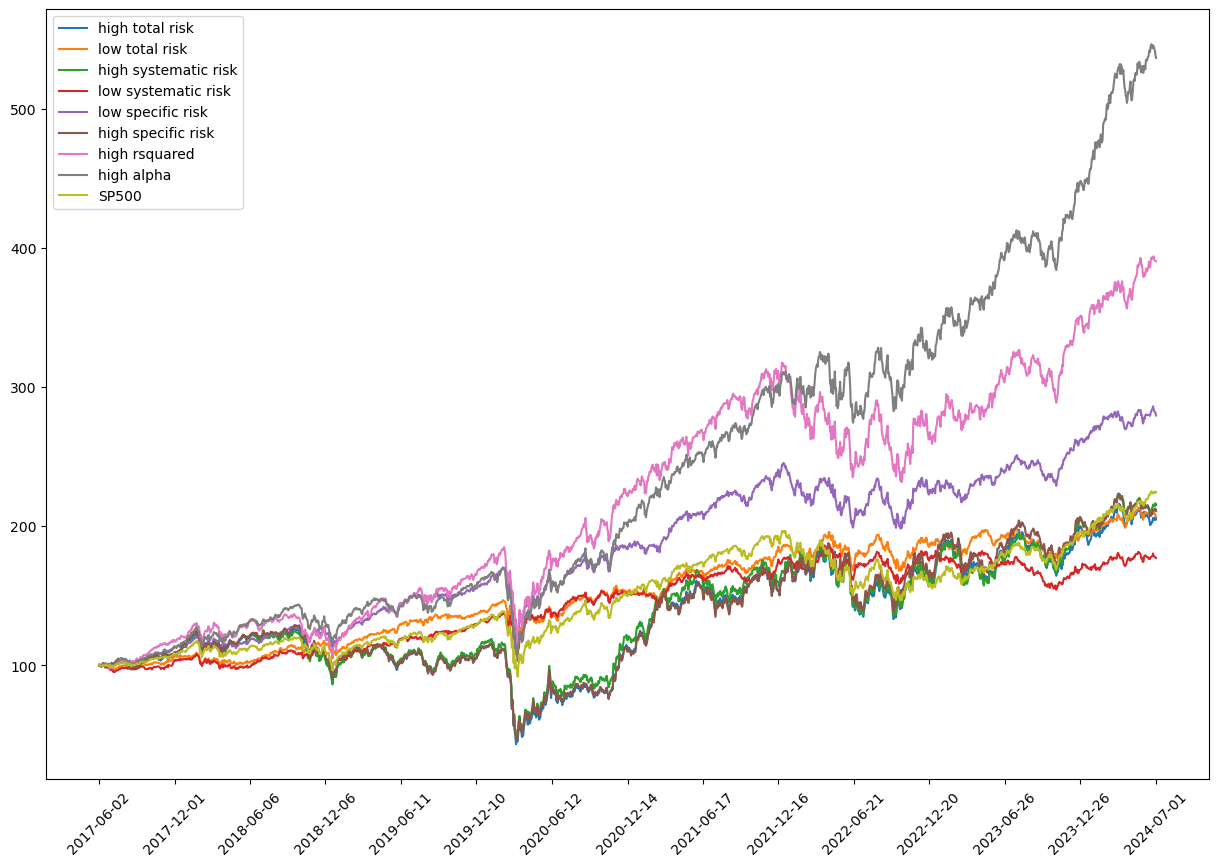

In [140]:
plt.figure(figsize=(15,10))
plt.plot(SP500['Date'], portfoliovalue_toptot, label='high total risk')
plt.plot(SP500['Date'], portfoliovalue_lowtot, label='low total risk')
plt.plot(SP500['Date'], portfoliovalue_topsyst, label='high systematic risk')
plt.plot(SP500['Date'], portfoliovalue_lowsyst, label='low systematic risk')
plt.plot(SP500['Date'], portfoliovalue_lowspec, label='low specific risk')
plt.plot(SP500['Date'], portfoliovalue_topspec, label='high specific risk')
plt.plot(SP500['Date'], portfoliovalue_rsquared, label='high rsquared')
plt.plot(SP500['Date'], portfoliovalue_alpha, label='high alpha')
plt.plot(SP500['Date'], SP500['Price']*100/SP500['Price'][1], label='SP500')
plt.legend()

num_ticks = 15
tick_positions = np.linspace(0, len(SP500['Date']) - 1, num=num_ticks, dtype=int)
plt.xticks(tick_positions, [SP500['Date'][i+1] for i in tick_positions], rotation=45)


#plt.plot(portfoliovalue_SP500)